<a href="https://www.kaggle.com/code/amankumar2002/anime-recommender-system?scriptVersionId=120156288" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/anime-recommendations-database/rating.csv
/kaggle/input/anime-recommendations-database/anime.csv


In [3]:
anime = pd.read_csv("/kaggle/input/anime-recommendations-database/anime.csv")
# rating = pd.read_csv("/kaggle/input/anime-recommendations-database/rating.csv")


In [4]:
anime.shape

(12294, 7)

In [5]:
anime.dropna(inplace=True)

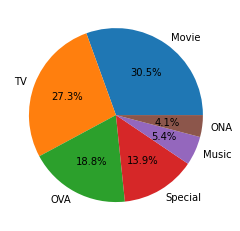

In [6]:
plt.pie(anime["type"].value_counts(),autopct="%.1f%%", labels=['Movie', 'TV', 'OVA', 'Special', 'Music', 'ONA'])
plt.show()

In [7]:
anime.shape

(12017, 7)

In [8]:
anime["episodes"] = anime["episodes"].astype(str)
anime["rating"] = anime["rating"].astype(str)
anime["members"] = anime["members"].astype(str)

In [9]:
anime["tags"] = anime["name"] + anime["genre"] + anime["type"] + anime["episodes"] + anime["rating"] + anime["members"]

In [10]:
anime

,anime_id,name,genre,type,episodes,rating,members,tags
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,"Kimi no Na wa.Drama, Romance, School, Supernat..."
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,"Fullmetal Alchemist: BrotherhoodAction, Advent..."
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,"Gintama°Action, Comedy, Historical, Parody, Sa..."
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,"Steins;GateSci-Fi, ThrillerTV249.17673572"
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,"Gintama&#039;Action, Comedy, Historical, Parod..."
...,...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211,Toushindai My Lover: Minami tai Mecha-MinamiHe...
12290,5543,Under World,Hentai,OVA,1,4.28,183,Under WorldHentaiOVA14.28183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219,Violence Gekiga David no HoshiHentaiOVA44.88219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,Violence Gekiga Shin David no Hoshi: Inma Dens...


In [11]:
" ".join(anime["tags"][0].split())

'Kimi no Na wa.Drama, Romance, School, SupernaturalMovie19.37200630'

In [12]:
" ".join(anime["tags"][1].split())

'Fullmetal Alchemist: BrotherhoodAction, Adventure, Drama, Fantasy, Magic, Military, ShounenTV649.26793665'

In [13]:
data = anime[["anime_id", "name", "tags"]]

In [14]:
data.head()

,anime_id,name,tags
0,32281,Kimi no Na wa.,"Kimi no Na wa.Drama, Romance, School, Supernat..."
1,5114,Fullmetal Alchemist: Brotherhood,"Fullmetal Alchemist: BrotherhoodAction, Advent..."
2,28977,Gintama°,"Gintama°Action, Comedy, Historical, Parody, Sa..."
3,9253,Steins;Gate,"Steins;GateSci-Fi, ThrillerTV249.17673572"
4,9969,Gintama&#039;,"Gintama&#039;Action, Comedy, Historical, Parod..."


In [15]:
data["tags"] = data["tags"].apply(lambda x: x.lower())

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
# data["tags"] = data["tags"].replace(" ", "")

In [17]:
data.head()

,anime_id,name,tags
0,32281,Kimi no Na wa.,"kimi no na wa.drama, romance, school, supernat..."
1,5114,Fullmetal Alchemist: Brotherhood,"fullmetal alchemist: brotherhoodaction, advent..."
2,28977,Gintama°,"gintama°action, comedy, historical, parody, sa..."
3,9253,Steins;Gate,"steins;gatesci-fi, thrillertv249.17673572"
4,9969,Gintama&#039;,"gintama&#039;action, comedy, historical, parod..."


In [18]:
data["tags"] = data["tags"].str.replace("[,:;#@.&!-]"," ")
# data["tags"] = data["tags"].replace(" ", "")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
# data["tags"] = data["tags"].str.replace(" ","")

In [20]:
data.head(200)

,anime_id,name,tags
0,32281,Kimi no Na wa.,kimi no na wa drama romance school supernat...
1,5114,Fullmetal Alchemist: Brotherhood,fullmetal alchemist brotherhoodaction advent...
2,28977,Gintama°,gintama°action comedy historical parody sa...
3,9253,Steins;Gate,steins gatesci fi thrillertv249 17673572
4,9969,Gintama&#039;,gintama 039 action comedy historical parod...
...,...,...,...
195,1033,Sennen Joyuu,sennen joyuuaction adventure drama fantasy ...
196,32188,Steins;Gate: Kyoukaimenjou no Missing Link - D...,steins gate kyoukaimenjou no missing link d...
197,3091,xxxHOLiC Kei,xxxholic keicomedy drama mystery psychologi...
198,12115,Berserk: Ougon Jidai-hen III - Kourin,berserk ougon jidai hen iii kourinaction a...


In [21]:
from sklearn.feature_extraction.text import CountVectorizer

In [22]:
cv = CountVectorizer()

In [23]:
vectors = cv.fit_transform(data["tags"]).toarray()

In [24]:
len(cv.vocabulary_)

31602

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [26]:
tf = TfidfVectorizer()

In [27]:
tf_idf = tf.fit_transform(data["tags"])

In [28]:
print(tf.idf_)
print(tf._tfidf)
# print(tf.get_feature_names_out())
# print(tf.get_feature_names())[0:10]

[8.44825066 9.70101362 9.70101362 ... 9.70101362 9.70101362 9.70101362]
TfidfTransformer()


In [29]:
from sklearn.metrics.pairwise import cosine_similarity

In [30]:
similarity2 = cosine_similarity(tf_idf)

In [31]:
similarity = cosine_similarity(vectors)

In [32]:
sorted(list(enumerate(similarity[1])), reverse=True, key=lambda x: x[1])[1:6]

[(200, 0.6),
 (402, 0.6),
 (1558, 0.5715476066494082),
 (1967, 0.5270462766947299),
 (5707, 0.47809144373375745)]

In [33]:
sorted(list(enumerate(similarity2[1])), reverse=True, key=lambda x: x[1])[1:6]

[(1967, 0.3908217795718891),
 (1558, 0.3854863881936675),
 (402, 0.3847983354087095),
 (971, 0.34321264426074627),
 (200, 0.3027956559484936)]

In [34]:
def recommend2(anime):
    index = data[data["name"]==anime].index[0]
    distance = similarity2[index]
    anime_name = sorted(list(enumerate(distance)), reverse=True, key=lambda x: x[1])[1:15]    
    for i in anime_name:
        print(data.iloc[i[0]][1])

In [35]:
data[data["name"]=="Fullmetal Alchemist: Brotherhood"].index[0]

1

In [36]:
recommend2("Steins;Gate")

Steins;Gate: Oukoubakko no Poriomania
Steins;Gate Movie: Fuka Ryouiki no Déjà vu
Steins;Gate: Kyoukaimenjou no Missing Link - Divide By Zero
Steins;Gate: Soumei Eichi no Cognitive Computing
Hal
Terra e...
Nayuta
Heroman
Sequence
Nora
Spriggan
A.D. Police (TV)
Karneval
Mars


In [37]:
def recommend(anime):
    index = data[data["name"]==anime].index[0]
    distance = similarity[index]
    anime_name = sorted(list(enumerate(distance)), reverse=True, key=lambda x: x[1])[1:15]    
    for i in anime_name:
        print(data.iloc[i[0]][1])

In [38]:
recommend("Fullmetal Alchemist: Brotherhood")

Fullmetal Alchemist
Fullmetal Alchemist: Brotherhood Specials
Fullmetal Alchemist: The Sacred Star of Milos
Fullmetal Alchemist: Reflections
Arion
Fullmetal Alchemist: The Conqueror of Shamballa
Fullmetal Alchemist: Brotherhood - 4-Koma Theater
Kkomaeosa Ttori
Fantasia
Meoteoldosa
Berserk
Tsubasa: Shunraiki
Digimon Adventure 02
Lodoss-tou Senki: Eiyuu Kishi Den


## recommend("Berserk: Ougon Jidai-hen III - Kourin")

In [39]:
for i in data["name"].unique():
    print(i)

Kimi no Na wa.
Fullmetal Alchemist: Brotherhood
Gintama°
Steins;Gate
Gintama&#039;
Haikyuu!!: Karasuno Koukou VS Shiratorizawa Gakuen Koukou
Hunter x Hunter (2011)
Ginga Eiyuu Densetsu
Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare
Gintama&#039;: Enchousen
Clannad: After Story
Koe no Katachi
Gintama
Code Geass: Hangyaku no Lelouch R2
Haikyuu!! Second Season
Sen to Chihiro no Kamikakushi
Shigatsu wa Kimi no Uso
Mushishi Zoku Shou 2nd Season
Ookami Kodomo no Ame to Yuki
Code Geass: Hangyaku no Lelouch
Hajime no Ippo
Rurouni Kenshin: Meiji Kenkaku Romantan - Tsuioku-hen
Cowboy Bebop
One Punch Man
Mononoke Hime
Suzumiya Haruhi no Shoushitsu
Monogatari Series: Second Season
Mushishi Zoku Shou
Mushishi
Tengen Toppa Gurren Lagann
Great Teacher Onizuka
Natsume Yuujinchou Go
Hajime no Ippo: New Challenger
Mushishi Zoku Shou: Suzu no Shizuku
Natsume Yuujinchou Shi
Howl no Ugoku Shiro
Fate/Zero 2nd Season
Kizumonogatari II: Nekketsu-hen
Monster
Bakuman. 3rd Season
Death Note
Gintama°: Aizome